RADIX2:

[ 1.+0.j -1.+0.j] 



D:\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


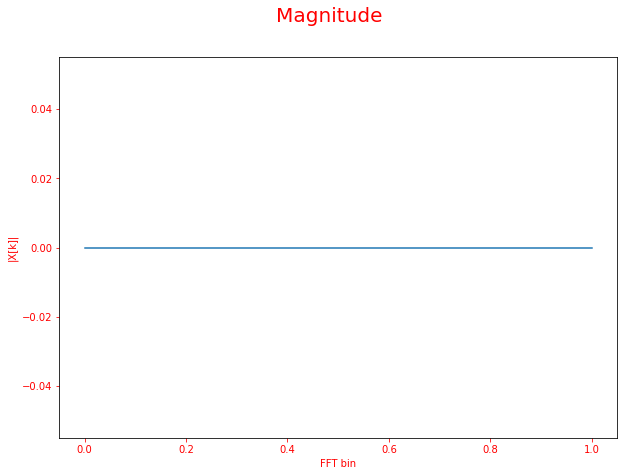

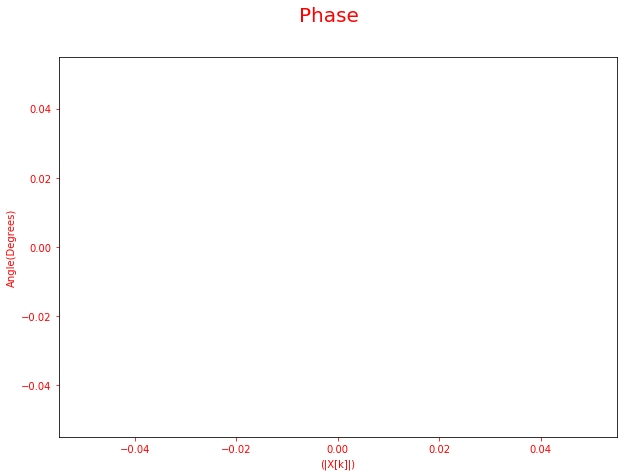

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import math
#Python signal generator. 


class Signal(object):
    f =1
    a=1
    shift=0
    Fs=60
    h=2
    wtype = 0
    binsize = 16
    def __init__(self,freq,amplitude,shift):
        self.f=freq
        self.a=amplitude
        self.shift= (shift / 180)*np.pi
        
    def fig(self):
        fig = plt.figure(figsize=(10,7))
        ax = fig.add_subplot(111)
        ax.xaxis.label.set_color('red')
        ax.yaxis.label.set_color('red')
        ax.tick_params(axis='x', colors='red')
        ax.tick_params(axis='y', colors='red')
        plt.xlabel('radians')
        plt.ylabel('voltage(V)')
        
    def sine(self, Fs):
        self.Fs=Fs
        self.wtype = 0
        self.fig()
        x=np.linspace(-2*np.pi,2*np.pi, Fs) 
        plt.plot(x,self.fsi(x))
        plt.show()
        
    def fsi(self,x):
        value = 0.0
        x = (x - self.shift)
        value = np.sin(2*np.pi*self.f*x / self.Fs)
        return value
    def fsq(self,x):    
        value = 0.0
        h = self.h
        x = (x - self.shift)
        for h in range(1, h):
            value = value + (np.sin(2 * np.pi * self.f * x * (1/self.Fs)* (2 * h - 1))/(2 * h - 1))
        value *= (self.a*( 4 / np.pi))
        return value
    def fst(self,x):
        value = 0.0
        h= self.h
        x = (x - self.shift)
        for h in range(1, h):
            value = value + ((-1)**(h+1))*(np.sin(2 * np.pi * self.f * x * (1/self.Fs)* (2 * h - 1))/(((2 * h) - 1)*((2 * h) - 1)))
        value *= self.a*( 8 / ((np.pi)**2))
        return value
    def fss(self,x):
        value = 0.0
        h = self.h
        x = (x - self.shift)
        for h in range(1,h):
            value = value + (np.sin(2 * np.pi * x * self.f * h * (1 / self.Fs)) / h)*((-1)**h)
        value *= (-2 / np.pi)
        return value
                                                      
    def square(self, Fs, Harmonics):
        self.Fs = Fs
        self.h = Harmonics
        self.wtype = 1
        x = np.linspace(-2*np.pi,2*np.pi, self.Fs)
        self.fig()
        plt.plot(x, self.fsq(x))   
        plt.show()            
                                                      
    def triangle(self, Fs, Harmonics):
        self.Fs = Fs
        self.h = Harmonics
        self.wtype = 2
        x = np.linspace(-2*np.pi,2*np.pi, self.Fs)
        self.fig()
        plt.plot(x, self.fst(x))
        plt.show()
        
    def sawtooth(self, Fs, Harmonics):
        self.Fs = Fs
        self.h = Harmonics
        self.wtype = 3
        x = np.linspace(-2*np.pi, 2*np.pi, self.Fs)
        self.fig()
        plt.plot(x, self.fss(x))
        plt.show()
        
    def op(self, wtype, x):
        if (wtype == 0):
            return self.fsi(x)
        elif (wtype == 1):
            return self.fsq(x)
        elif (wtype == 2):
            return self.fst(x)
        elif (wtype == 3):
            return self.fss(x)
    
    def multiply(self, sig):
        self.fig()
        x1 = np.linspace(-2*np.pi, 2*np.pi, self.Fs)
        x2 = np.linspace(-2*np.pi, 2*np.pi, sig.Fs)
        plt.plot(x1, self.op(self.wtype, x1) * sig.op(sig.wtype,x2))
    
    def add(self,sig):
        self.fig()
        x= np.linspace(-2*np.pi, 2*np.pi, self.Fs)
        plt.plot(x, self.op(self.wtype,x) + sig.op(sig.wtype,x))
    
    def subtract(self, sig):
        self.fig()
        x = np.linspace(-2*np.pi, 2*np.pi, self.Fs)
        plt.plot(x, self.op(self.wtype,x) - sig.op(sig.wtype,x))

class Modulation(Signal):
    m = 1
    fshift = np.array([])
    def __init__(self, centerFreq, amplitude, m):
        self.f = centerFreq
        self.a = amplitude
        self.wtype = 0
        self.m = m
    def modindex(self,modindex):
        self.m = modindex
    def AM(self, sig):
        self.fig()
        x = np.linspace(-2*np.pi, 2*np.pi, sig.Fs)
        if (self.wtype == 0):
            plt.plot(x, (1/2)*((self.m*sig.op(sig.wtype,x))+1)*np.cos(2*np.pi*x*self.f)*self.a)
        else:
            plt.plot(x, (1/2)*(sig.op(sig.wtype,x)+1)*(self.op(self.wtype,x)))
        plt.show()
    def FM(self,sig):
        tao = 0
        self.fig()
        x = np.linspace(-2*np.pi, 2*np.pi, sig.Fs)
        fshift = np.zeros(x.size)
        if(self.wtype == 0):
            fshift = self.fmi(x)
            plt.plot(x, sig.a*np.cos(2*np.pi*sig.f*x + (self.m)*(self.a)*fshift))
        else:
            fshift = self.fmi(x)
        plt.show()
        
            #sig.shift = self.op(sig.wtype,x) * self.m
            #plt.plot(x, sig.a * sig.op(sig.wtype,x))
        
    def fmi (self, x):
        value = np.zeros(x.size)
        for index in range(0, x.size):
            upperlimit = x[index]
            value[index], err = integrate.quad(lambda tao: np.sin(2*np.pi*self.f*tao), - 2*np.pi, upperlimit)
        return value
        
####FFT Methods Below
def BitReversal(value, binsize):
    val2 = 0
    count = int(math.log(binsize,2))
    for x in range(0, int(count)):
        if (value & 1 == 1):
            val2 <<= 1
            val2 = val2 + 1
        elif(value & 1 == 0):
            val2 <<= 1
        value >>= 1
    return val2
def Reindex(a, binsize):
    output = np.zeros(a.size,dtype=np.complex_)
    index = 0 
    for index in range(0, a.size):
        y = BitReversal(index, binsize)
        output[index] = a[y]
    return output
def DFT(tsig, binsize):
    k=0
    if (tsig.size != binsize):
        tsig = np.pad(tsig, (0, (binsize-tsig.size)), 'constant')
    out = np.zeros(tsig.size, dtype=np.complex_)
    for k in range(0, out.size-1, 1):
        for n in range(0, tsig.size -1, 1):
            out[k] += tsig[n] * np.exp((-1j*2*np.pi*k*n)/tsig.size)
    return out
def DIT(a, binsize): #Decimation in time.
    if (a.size != binsize):
        a= np.pad(a, (0, (binsize-a.size)), 'constant')
    a = Reindex(a,binsize)
    stages = int(math.log(binsize,2))
    a2 = np.zeros(a.size, dtype=np.complex_)
    for s in range (1, stages+1):
        J = int(binsize/ (2**s))
        I = int(2**s)
        for j in range(0, J): #num of I point dfts.
            for i in range(0, I): #butterflies!
                if i < (I/2):
                    a2[i+(j*I)]=a[i+(j*I)]+tw((i*J),binsize)*a[i+int((I/2))+(j*I)]
                elif i >= (I/2):
                    a2[i+(j*I)]= a[i-int((I/2))+(j*I)]-a[i+(j*I)]*tw((i-int((I/2))),binsize)
        np.copyto(a,a2)
    return a2
def tw(n, binsize): #twiddle factor.
    W = np.exp((-1j*2*np.pi*n)/ binsize)
    return W

def FFTPLOT(FFT, complexT): #complex = 0 (magnitude), = 1 (seperate graphs). #phase = 0 (show phase),phase = 1 (don't show phase)
    x1= np.arange(0,FFT.size)
    if complexT == 0:
        phaseAngle = FFT
        for index in range(0, FFT.size):
            phaseAngle[index] = np.arctan((FFT[index].imag)/(FFT[index].real))
            FFT[index] = np.abs(FFT[index])
        figMag = fig()
        plt.xlabel('FFT bin')
        plt.ylabel('|X[k]|')
        plt.suptitle('Magnitude', fontsize=20, color = 'red')
        plt.plot(x1,FFT)
        plt.show()
        figPhase = fig()
        plt.xlabel('(|X[k]|)')
        plt.ylabel('Angle(Degrees)')
        plt.suptitle('Phase', fontsize=20, color = 'red')
        plt.plot(FFT,phaseAngle)
        plt.show()
    elif complexT != 0:
        figReal = fig()
        figReal.xlabel('FFT bin')
        figReal.ylabel('X[k]')
        plt.suptitle('Magnitude(Real)', fontsize=20, color = 'red')
        plt.plot(x1,FFT.real)
        plt.show()
        figImag = fig()
        plt.xlabel('FFT bin')
        plt.ylabel('X[k]')
        plt.suptitle('Magnitude(Imag)', fontsize=20, color = 'red')
        plt.plot(x1,FFT.Imaginary)
        plt.show()
def fig():
        fig = plt.figure(figsize=(10,7))
        ax = fig.add_subplot(111)
        ax.xaxis.label.set_color('red')
        ax.yaxis.label.set_color('red')
        ax.tick_params(axis='x', colors='red')
        ax.tick_params(axis='y', colors='red')
#binsize = x point DFT
binsize = 2
a = np.zeros(binsize,dtype=np.complex_)
dt = np.zeros(binsize,dtype=np.complex_)
for t in range(0,binsize):
    dt[t] = t
b=dt
print("RADIX2:\n")
b= DIT(b,binsize)
print(b,"\n")
FFTPLOT(b,0)


#print("DFT:\n")
#a=DFT(a,binsize)
#print(a)


        